In [1]:
import proteosim as ps

In [2]:
print(ps.__file__)

c:\Users\boris\proteosim\proteosim\__init__.py


### 1. Import proteins from FASTA file

In [3]:
proteins = ps.read_fasta("data/sample_proteins.fasta")
len(proteins)

3

### 2. Protein digestion

In [4]:
protein_1 = list(proteins.keys())[1]

In [5]:
peptides_p1 = ps.digest_protein_sequence(proteins[protein_1], cleave_pattern=ps.enzyme_cleavage_patterns["Trypsin"])

Nr. of digested peptides: 14
Nr. of digested peptides selected: 5


In [6]:
peptides = ps.digest_protein_collection(proteins, cleave_pattern=ps.enzyme_cleavage_patterns['Trypsin'])
peptides

{'P11802': ['MATSR',
  'YEPVAEIGVGAYGTVYK',
  'DPHSGHFVALK',
  'VPNGGGGGGGLPISTVR',
  'EVALLR',
  'LEAFEHPNVVR',
  'LMDVCATSR',
  'VTLVFEHVDQDLR',
  'TYLDK',
  'APPPGLPAETIK',
  'GLDFLHANCIVHR',
  'DLKPENILVTSGGTVK',
  'LADFGLAR',
  'IYSYQMALTPVVVTLWYR',
  'APEVLLQSTYATPVDMWSVGCIFAEMFR',
  'KPLFCGNSEADQLGK',
  'IFDLIGLPPEDDWPR',
  'DVSLPR',
  'GAFPPR',
  'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK',
  'ISAFR',
  'ALQHSYLHK',
  'DEGNPE'],
 'A0A087WTH1': ['MEDEEK',
  'AVEILGNTEAAHPPSPIR',
  'CCWLR',
  'CLAATSIICGCSCLGVMALVFAIK',
  'SEEAVR'],
 'A0A087WTH5': ['MVIEWERPR',
  'MILSNTTAVTPFLTK',
  'LWQETVQQGGNMSGLAR',
  'SGDGK',
  'LEALYVLMVLGFFGFFTLGIMLSYIR',
  'LEHSNDPFNVYIESNAWQEK',
  'AYVQAR',
  'VLESYR',
  'SCYVVENHLAIEQPNTHLPETKPSP']}

In [7]:
pep_p1_coverage = ps.compute_sequence_coverage(proteins[protein_1], peptides_p1)
pep_p1_coverage

Sequence coverage: 50.86206896551724 %


50.86206896551724

### 3. Liquid Chromatography

We first need to pool our peptides into a list that we can then use in our functions.

In [8]:
peptides_list = list(peptides.values())
index = 0
pooled_peptides = []
for x in peptides_list:
    if index <= len(peptides_list) - 1:
        pooled_peptides = pooled_peptides + peptides_list[index]
        index = index + 1
    else: continue

In [9]:
retention_time_peptides = ps.predict_lc_retention_times(pooled_peptides)
retention_time_peptides

{'MATSR': np.float64(8.9),
 'YEPVAEIGVGAYGTVYK': np.float64(42.7),
 'DPHSGHFVALK': np.float64(29.0),
 'VPNGGGGGGGLPISTVR': np.float64(31.6),
 'EVALLR': np.float64(25.5),
 'LEAFEHPNVVR': np.float64(33.5),
 'LMDVCATSR': np.float64(23.6),
 'VTLVFEHVDQDLR': np.float64(41.0),
 'TYLDK': np.float64(11.1),
 'APPPGLPAETIK': np.float64(29.1),
 'GLDFLHANCIVHR': np.float64(47.5),
 'DLKPENILVTSGGTVK': np.float64(34.5),
 'LADFGLAR': np.float64(29.5),
 'IYSYQMALTPVVVTLWYR': np.float64(78.1),
 'APEVLLQSTYATPVDMWSVGCIFAEMFR': np.float64(96.2),
 'KPLFCGNSEADQLGK': np.float64(28.0),
 'IFDLIGLPPEDDWPR': np.float64(51.3),
 'DVSLPR': np.float64(14.7),
 'GAFPPR': np.float64(16.3),
 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': np.float64(80.9),
 'ISAFR': np.float64(19.9),
 'ALQHSYLHK': np.float64(28.5),
 'DEGNPE': np.float64(-4.0),
 'MEDEEK': np.float64(-0.7),
 'AVEILGNTEAAHPPSPIR': np.float64(43.8),
 'CCWLR': np.float64(24.6),
 'CLAATSIICGCSCLGVMALVFAIK': np.float64(96.2),
 'SEEAVR': np.float64(5.7),
 'MVIEWERPR': np.f

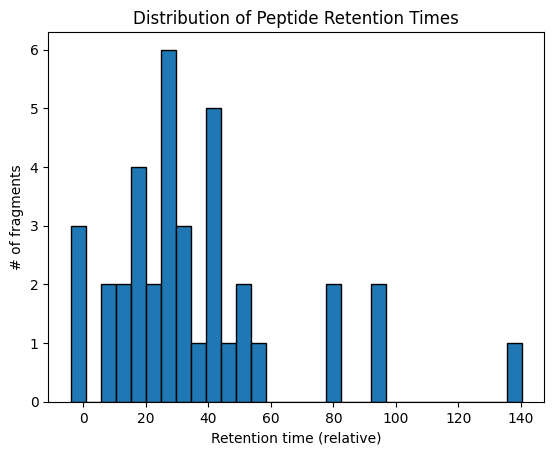

In [10]:
ps.plot_retention_time(retention_times=retention_time_peptides)

In [11]:
ps.select_retention_time_window(retention_time_peptides, lower_ret_time=0, upper_ret_time=10)

{'MATSR': np.float64(8.9), 'SEEAVR': np.float64(5.7)}

### 4. MS Spectra

We first need to define a library containing amino acid/molecular mass pairs.

In [12]:
amino_acid_mass_dalton = {
    'A': 71.08, 'R': 156.19, 'N': 114.10, 'D': 115.09,
    'C': 103.15, 'E': 129.12, 'Q': 128.13, 'G': 57.05,
    'H': 137.14, 'I': 113.16, 'L': 113.16, 'K': 128.17,
    'M': 131.19, 'F': 147.18, 'P': 97.12, 'S': 87.08,
    'T': 101.11, 'W': 186.21, 'Y': 163.18, 'V': 99.13,
}

In [13]:
ps.calculate_mol_mass('MATSR', amino_acid_mass_dict=amino_acid_mass_dalton)

{'MATSR': 546.65}

In [16]:
pooled_peptides_mass = ps.calculate_mol_mass_collection(pooled_peptides, amino_acid_mass_dict=amino_acid_mass_dalton)
pooled_peptides_mass

{'MATSR': 546.65,
 'YEPVAEIGVGAYGTVYK': 1798.04,
 'DPHSGHFVALK': 1189.3400000000001,
 'VPNGGGGGGGLPISTVR': 1476.6499999999996,
 'EVALLR': 681.84,
 'LEAFEHPNVVR': 1292.47,
 'LMDVCATSR': 977.18,
 'VTLVFEHVDQDLR': 1552.7599999999998,
 'TYLDK': 620.71,
 'APPPGLPAETIK': 1172.4099999999999,
 'GLDFLHANCIVHR': 1476.73,
 'DLKPENILVTSGGTVK': 1652.9099999999999,
 'LADFGLAR': 843.99,
 'IYSYQMALTPVVVTLWYR': 2185.63,
 'APEVLLQSTYATPVDMWSVGCIFAEMFR': 3144.7099999999996,
 'KPLFCGNSEADQLGK': 1588.81,
 'IFDLIGLPPEDDWPR': 1765.02,
 'DVSLPR': 667.77,
 'GAFPPR': 625.74,
 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK': 3316.8599999999997,
 'ISAFR': 574.6899999999999,
 'ALQHSYLHK': 1078.24,
 'DEGNPE': 641.6,
 'MEDEEK': 761.81,
 'AVEILGNTEAAHPPSPIR': 1854.12,
 'CCWLR': 661.86,
 'CLAATSIICGCSCLGVMALVFAIK': 2370.05,
 'SEEAVR': 671.72,
 'MVIEWERPR': 1197.4299999999998,
 'MILSNTTAVTPFLTK': 1618.9700000000003,
 'LWQETVQQGGNMSGLAR': 1857.0699999999997,
 'SGDGK': 444.44,
 'LEALYVLMVLGFFGFFTLGIMLSYIR': 2996.7300000000005,
 'LEHSND

In [20]:
pooled_peptides_mz = list(ps.calculate_mz_collection(pooled_peptides_mass).values())
pooled_peptides_mz

[274.332,
 900.0269999999999,
 595.677,
 739.3319999999998,
 341.927,
 647.242,
 489.597,
 777.3869999999998,
 311.362,
 587.2119999999999,
 739.372,
 827.4619999999999,
 423.002,
 1093.8220000000001,
 1573.3619999999999,
 795.4119999999999,
 883.5169999999999,
 334.892,
 313.877,
 1659.437,
 288.352,
 540.127,
 321.807,
 381.912,
 928.0669999999999,
 331.937,
 1186.0320000000002,
 336.867,
 599.7219999999999,
 810.4920000000001,
 929.5419999999998,
 223.227,
 1499.3720000000003,
 1202.2920000000001,
 345.40200000000004,
 374.937,
 1394.0819999999999]

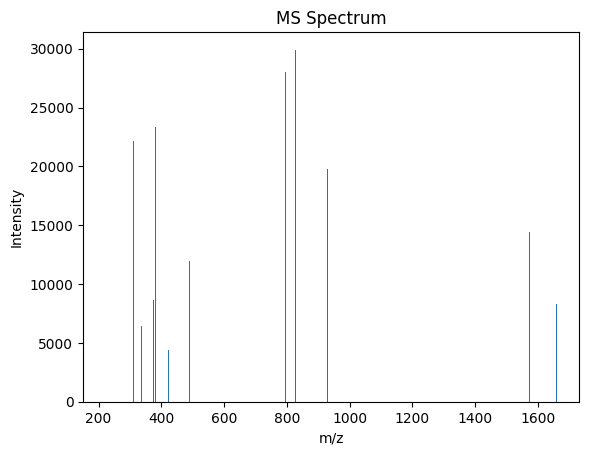

In [22]:
ps.plot_spectrum(pooled_peptides_mz)